# ECE 420 – Prelab 6: Image Enhancing

## Part 1 – Image Enhancement

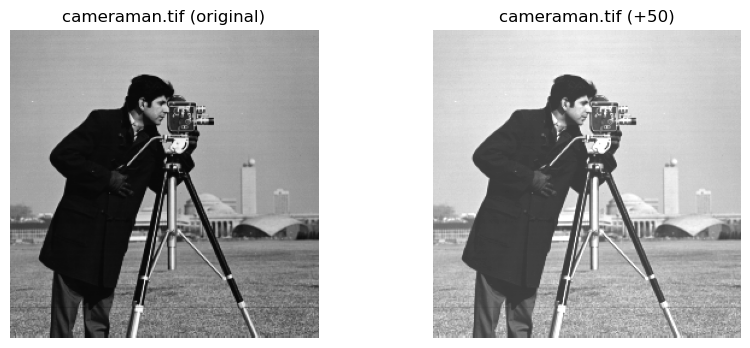

In [8]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

%matplotlib inline

def imadd(pic, brightness=50):
    """Increase brightness by a constant with dtype-safe clipping."""
    if np.issubdtype(pic.dtype, np.integer):
        info = np.iinfo(pic.dtype)
        out = pic.astype(np.int64) + int(brightness)
        out = np.clip(out, info.min, info.max)
        return out.astype(pic.dtype)
    else:
        # float images assumed in [0,1]
        out = pic + float(brightness)
        return np.clip(out, 0.0, 1.0)

# Load original image (uint8)
cameraman_origin = imageio.imread('cameraman.tif')

# Apply brightness enhancement (+50)
cameraman_bright_50 = imadd(cameraman_origin.copy(), 50)

# Display with fixed scaling for uint8
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('cameraman.tif (original)')
plt.imshow(cameraman_origin, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('cameraman.tif (+50)')
plt.imshow(cameraman_bright_50, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


### Assignment 1 – Brightness Adjustment

Dynamic ranges:
eco (orig):   1748
eco (+50):    1748
eco (+300):   1748


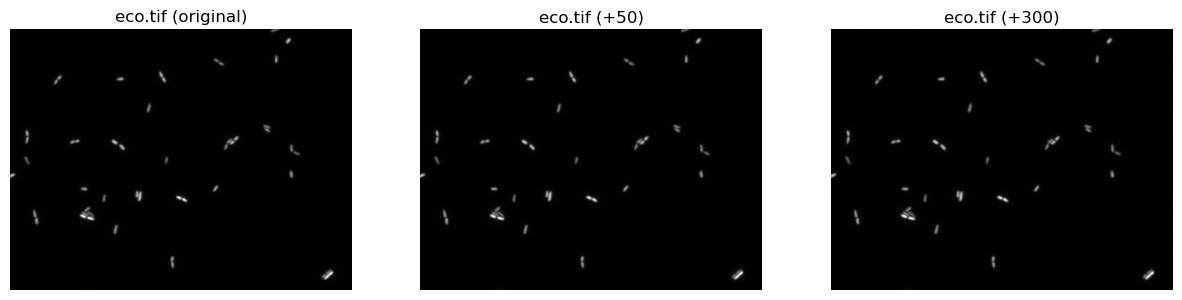

In [10]:
def dynamic_range(img):
    # number of distinct pixel values present
    return np.unique(img).size

# eco.tif is uint16
eco_origin = imageio.imread('eco.tif')

# Apply brightness
eco_bright_50  = imadd(eco_origin.copy(), 50)
eco_bright_300 = imadd(eco_origin.copy(), 300)

# Print dynamic ranges
print("Dynamic ranges:")
print(f"eco (orig):   {dynamic_range(eco_origin)}")
print(f"eco (+50):    {dynamic_range(eco_bright_50)}")
print(f"eco (+300):   {dynamic_range(eco_bright_300)}")

# Show with fixed uint16 scaling to avoid autoscaling
plt.figure(figsize=(15,4))
for i, (img, title) in enumerate([
    (eco_origin, "eco.tif (original)"),
    (eco_bright_50, "eco.tif (+50)"),
    (eco_bright_300, "eco.tif (+300)")
]):
    plt.subplot(1,3,i+1)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


### Questions – Part 1

1. **Dynamic range:** All three (`eco` original, +50, +300) have the same dynamic range of 1748. Adding a constant shifts values but doesn't change how many unique values exist (except for clipping at extremes).  
2. **Brightness +300:** Values clip at the max (65535 for uint16), so the image saturates to white. If not clipped, uint16 wraps around, which can make it look black.  
3. **Enhancement by brightness:** No. Simply shifting brightness doesn’t improve contrast or image quality.


## Part 2 – Histogram Equalization

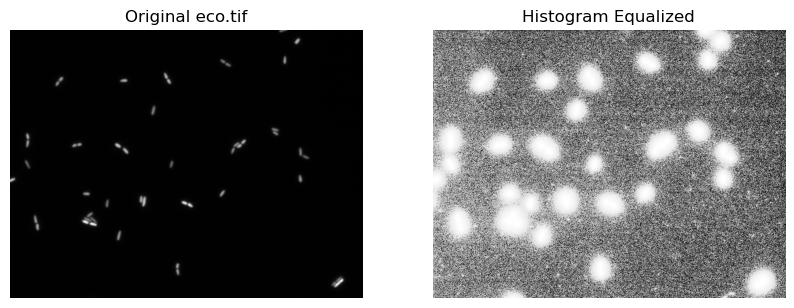

In [4]:
from skimage import exposure

eco_origin = imageio.imread('eco.tif')

# Apply histogram equalization
eco_histeq = exposure.equalize_hist(eco_origin)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Original eco.tif')
plt.imshow(eco_origin, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram Equalized')
plt.imshow(eco_histeq, cmap='gray')
plt.axis('off')
plt.show()

### Question – Part 2
Repeating histogram equalization doesn’t improve the result. Once the distribution is equalized, applying it again has no further effect.


## Part 3 – 2-D Convolution (Gaussian Smoothing)

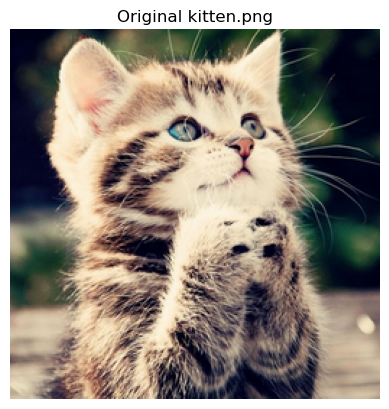

In [6]:
import numpy
from scipy import signal

def gengaussian(size=5, sigma=3.0):
    """Generate a 2D Gaussian kernel."""
    if size % 2 == 0 or size < 2:
        raise ValueError("Size must be odd and >= 3")
    kernel = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            kernel[x,y] = np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2))
    return kernel / np.sum(kernel)

kitten_origin = imageio.imread('kitten.png')
plt.imshow(kitten_origin)
plt.title('Original kitten.png')
plt.axis('off')
plt.show()


### Assignment 3 – Convolution

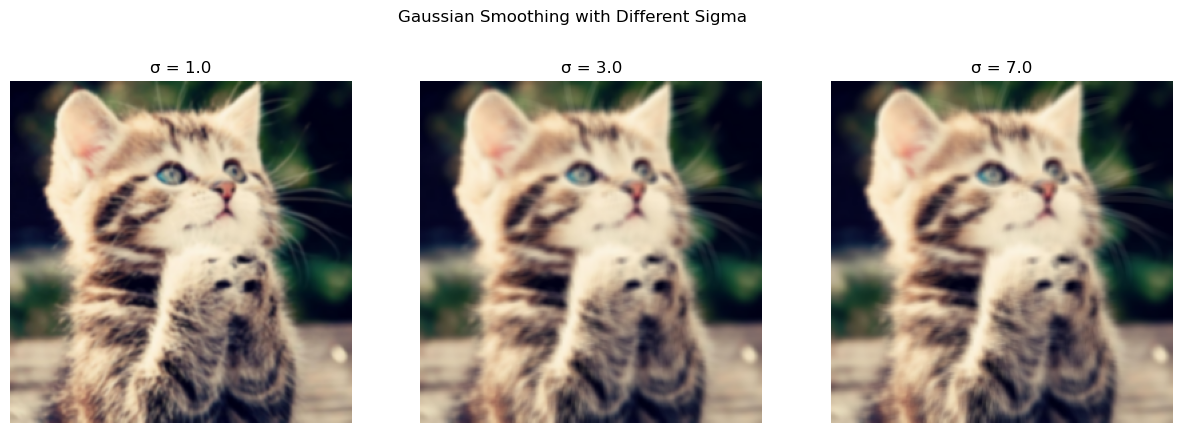

In [7]:
sigma_values = [1.0, 3.0, 7.0]
plt.figure(figsize=(15,5))

for i, sigma in enumerate(sigma_values):
    kernel = gengaussian(5, sigma)
    blurred = np.zeros_like(kitten_origin, dtype=np.float64)
    for c in range(3):
        blurred[:,:,c] = signal.convolve2d(kitten_origin[:,:,c], kernel, mode='same', boundary='symm')
    blurred = np.clip(blurred, 0, 255).astype(np.uint8)
    
    plt.subplot(1,len(sigma_values),i+1)
    plt.imshow(blurred)
    plt.title(f'σ = {sigma}')
    plt.axis('off')

plt.suptitle('Gaussian Smoothing with Different Sigma')
plt.show()


### Question – Part 3

Larger sigma values blur the image more, reducing noise but also smoothing away details. Smaller sigma preserves more edges but blurs less.
